In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'DataSet\canada_per_capita_income.csv')
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


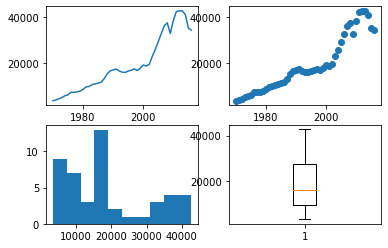

In [3]:
figure, axis = plt.subplots(2, 2)

axis[0,0].plot(data.year,data['per capita income (US$)'])
axis[0,1].scatter(data.year,data['per capita income (US$)'])
axis[1,0].hist(data['per capita income (US$)'])
axis[1,1].boxplot(data['per capita income (US$)'])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = data.year
Y = data['per capita income (US$)']


In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=.8)

In [7]:
# making data 2D
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
model.fit(x_train,y_train)

LinearRegression()

In [10]:
pre = model.predict(x_test)
pre

array([30764.54716685, 20693.53944713, 19854.28880382, 31603.79781016,
       27407.54459361, 23211.29137706,   551.52400771, 37478.55231332,
        4747.77722425, 15658.03558728])

In [11]:
y_test,x_test

(37    36144.481220
 25    16369.317250
 24    15755.820270
 38    37446.486090
 33    22739.426280
 28    16622.671870
 1      3768.297935
 45    35175.188980
 6      7062.131392
 19    16426.725480
 Name: per capita income (US$), dtype: float64,
 array([[2007],
        [1995],
        [1994],
        [2008],
        [2003],
        [1998],
        [1971],
        [2015],
        [1976],
        [1989]], dtype=int64))

In [13]:
model.coef_

array([839.25064331])

In [14]:
model.intercept_

-1653611.493955131

In [15]:
model

LinearRegression()

In [16]:
model.predict([[2028]])

array([48388.81067634])

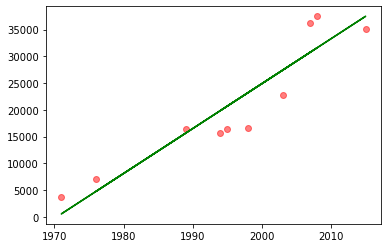

In [17]:
plt.scatter(x_test,y_test,color='r',alpha = .5)


plt.plot(x_test,model.predict(x_test),'g')

In [18]:
import pickle as pk

In [19]:
with open('income_pickle','wb') as file:
    pk.dump(model,file)

In [21]:
with open('income_pickle','rb') as file:
    md = pk.load(file)

In [22]:
md.coef_

array([839.25064331])

In [28]:
md.predict([[2028]])

array([48388.81067634])

In [35]:
import joblib

In [36]:
joblib.dump(model,'model_joblib')

['model_joblib']

In [37]:
mdl = joblib.load('model_joblib')

In [38]:
mdl.predict([[2028]])

array([48388.81067634])

In [48]:
mdl.score(x_train,y_train)

0.8982827825087651